<h2>Assumptions Check</h2>
<h3>Normality, collinearity and singularity</h3>

<br>(c) Marie-Eve Picard, Maude Picard, Andreanne Proulx, 2021

<b>Description</b>
<br>This script can be used to verified:
<ul><li>Accuracy of the dataset</li>
<li>Normality</li>
<li>Collinearity</li></ul>

In [3]:
#import required modules
import pandas as pd 
import numpy as np
import scipy
import scipy.stats as stats
import math
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
from scipy.spatial.distance import mahalanobis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import seaborn as sns
#sns.set_theme(style = "whitegrid")
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from factor_analyzer import FactorAnalyzer
from sklearn import preprocessing
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [4]:
#set pandas option so that we can see the entire dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

<b>Import the dataset</b>

In [5]:
#file_name = "C:/Users/mepic/OneDrive/Documents/Master/PSY6002/TP/donnees_tp1_v2.sav"
file_name = "/home/anproulx/donnees_tp1_v3.sav"
df = pd.read_spss(file_name)

<b>Accuracy of Data File</b>
<br>Check for possible duplicated rows

In [6]:
#Overview of the dataset
df.head()

,Sujet,Genre,Age,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,1.0,Masculin,15.0,4.0,4.0,2.0,6.0,3.0,4.0,4.0,6.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,4.0
1,2.0,Masculin,15.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,6.0,5.0,1.0,5.0,2.0,6.0,1.0,6.0,1.0,5.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
2,3.0,Féminin,14.0,5.0,6.0,3.0,6.0,3.0,6.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
3,4.0,Féminin,14.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,5.0,6.0,5.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
4,5.0,Féminin,14.0,6.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,4.0,4.0,1.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,3.0,6.0,6.0,2.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [7]:
#Overview of the columns in the dataset
df.columns

Index(['Sujet', 'Genre', 'Age', 'MA1001', 'MA1012r', 'MA1023', 'MA1034r',
       'MA1045', 'MA1056r', 'MA1067', 'MA1078r', 'MA1089', 'MA1096r', 'PH2005',
       'PH2027', 'PH2049', 'PH2071', 'ph2016r', 'ph2038r', 'ph2060r',
       'ph2082r', 'VE1006r', 'VE1017', 'VE1028r', 'VE1039', 'VE1050r',
       'VE1061', 'VE1072r', 'VE1083', 'VE1092r', 'VE1099', 'SS1009', 'SS1031',
       'SS1053', 'SS1075', 'SS1094', 'ss1020r', 'ss1042r', 'ss1064r',
       'ss1086r', 'ss1101r'],
      dtype='object')

In [11]:
#Replace 88 or 99 for NaN in Age and Genre
def changeMissing(var):
    for i in range (len(df[var])):
        if df[var][i] == 88 or df[var][i] == 99:
            df[var][i] = None

changeMissing('Age')
changeMissing('Genre')

<b>Descriptive Stats with the original dataset (including missing values)</b>
<ul><li>Mean & std</li>
<li>Min & Max</li>
<li>Number of missing</li></ul>

In [12]:
#Compute descriptive stats
des1 = df.describe(include = 'all')
#Add the number of missing values
des2 = df.isnull().sum().to_frame(name = 'missing').T
#Merged the number of missing values with the descriptive stats table
df_des = pd.concat([des1, des2])
df_des

,Sujet,Genre,Age,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
count,625.000000,622,622.000000,619.000000,617.000000,618.000000,616.000000,613.000000,620.000000,620.000000,616.000000,616.000000,619.000000,614.000000,619.000000,617.000000,621.000000,619.000000,615.000000,621.000000,619.000000,620.000000,620.000000,620.000000,616.000000,619.000000,619.000000,619.000000,619.000000,619.000000,620.000000,620.000000,618.000000,618.000000,614.000000,616.000000,618.000000,615.000000,617.000000,620.000000,620.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Féminin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,312.969600,NaN,14.578778,3.583199,3.627229,2.380259,4.003247,2.166395,3.993548,3.758065,4.375000,3.569805,3.567044,4.617264,4.495961,3.755267,3.900161,4.655897,4.609756,5.024155,5.048465,4.106452,2.569355,4.096774,3.712662,4.268174,3.226171,3.893376,3.882068,4.155089,4.027419,2.856452,4.574434,4.001618,4.197068,4.116883,4.606796,4.565854,4.581848,4.535484,4.454839
std,180.592217,NaN,0.666232,1.670448,1.772015,1.445744,1.643906,1.376167,1.611737,1.619604,1.697619,1.656227,1.790829,1.559613,1.520486,1.542707,1.597281,1.491999,1.493930,1.428194,1.358508,1.588007,1.484447,1.526393,1.470657,1.556635,1.715311,1.843805,1.492371,1.516421,1.443908,1.420041,1.465473,1.324864,1.249571,1.351653,1.463467,1.378690,1.343646,1.342856,1.334115
min,1.000000,NaN,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,157.000000,NaN,14.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,313.000000,NaN,14.000000,4.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,6.000000,6.000000,4.000000,2.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,469.000000,NaN,15.000000,5.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,4.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,4.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000


In [15]:
#Check the age
countAge = 0

for i in range (len(df['Age'])):
    if df['Age'][i] == 14 or df['Age'][i] == 15:
        countAge += 1

print("nb participants between 14 and 15: ", countAge, "; percentage between 14 and 15: ", 100*countAge/621)

nb participants between 14 and 15:  575 ; percentage between 14 and 15:  92.5925925925926


In [16]:
#Change the dataframe to include only the targeted variables
#In this case, remove :  Sujet, Genre and Age columns (the 3 first columns)
df_tp = df.drop(df.columns[[0 , 1 , 2]], axis = 1)
df_tp.head()

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,4.0,4.0,2.0,6.0,3.0,4.0,4.0,6.0,4.0,4.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,4.0
1,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,6.0,6.0,6.0,6.0,5.0,1.0,5.0,2.0,6.0,1.0,6.0,1.0,5.0,2.0,4.0,1.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
2,5.0,6.0,3.0,6.0,3.0,6.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
3,4.0,4.0,3.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,5.0,6.0,5.0,3.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
4,6.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,4.0,6.0,4.0,4.0,1.0,4.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,3.0,6.0,6.0,2.0,5.0,4.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [17]:
#Encode label value to ordinal values

# list all possible labels values
#labels = df["MA1001"].unique()

#labels = ["faux","plutot faux","plus faux que vrai","plus vrai que faux","plutot vrai", "vrai"]

#i = 1
#for column in df_tp.columns:
#    for i , label in zip(range(1,6), labels):
#        df_tp[column] = df_tp[column].replace(label, i)
    
#    i+=1
    
#df_tp = df_tp.astype(float)
#df_tp.head()

In [18]:
## Number of participants. 
#Note. By visually inspecting the data, we find that 4 participants have no values at all
print ("Total number of participants is : " + str(len(df_tp)))

Total number of participants is : 625


In [19]:
#Compute % of missing values excluding demographic variables
nb_missing = (df_des.loc['missing', : ].drop(['Sujet', 'Genre', 'Age'])).sum()
nb_tot = len(df_tp[df_tp.columns[0]]) * len(df_tp.columns)
print("% missing data: ", 100*nb_missing/nb_tot)

% missing data:  1.111578947368421


<b>Skewness & Kurtosis</b>

In [20]:
#calculate skewness
df_skew = df_tp.skew(axis = 0, skipna = True)

print(df_skew.shape)

df_skew = pd.DataFrame({'VI': df_skew.index, 'Value': df_skew.values})
print(df_skew)

(38,)
         VI     Value
0    MA1001 -0.096437
1   MA1012r -0.148379
2    MA1023  0.782279
3   MA1034r -0.423821
4    MA1045  1.113721
5   MA1056r -0.454028
6    MA1067 -0.306995
7   MA1078r -0.808725
8    MA1089 -0.133841
9   MA1096r -0.139475
10   PH2005 -0.973525
11   PH2027 -0.891452
12   PH2049 -0.176365
13   PH2071 -0.343704
14  ph2016r -0.887436
15  ph2038r -1.001280
16  ph2060r -1.498974
17  ph2082r -1.564263
18  VE1006r -0.481315
19   VE1017  0.655379
20  VE1028r -0.434436
21   VE1039 -0.246066
22  VE1050r -0.558079
23   VE1061  0.155382
24  VE1072r -0.318346
25   VE1083 -0.444955
26  VE1092r -0.501622
27   VE1099 -0.393652
28   SS1009  0.322828
29   SS1031 -0.898773
30   SS1053 -0.489628
31   SS1075 -0.704260
32   SS1094 -0.677098
33  ss1020r -0.966274
34  ss1042r -0.968081
35  ss1064r -0.890119
36  ss1086r -0.885056
37  ss1101r -0.795628


In [21]:
#print min and max skewness values with the corresponding variables
print(df_skew.loc[df_skew['Value']==min(df_skew['Value']), 'VI'], "Score min skewness: ", min(df_skew['Value']), "\n", df_skew.loc[df_skew['Value']==max(df_skew['Value']), 'VI'], "Score max skewness: ", max(df_skew['Value']))

17    ph2082r
Name: VI, dtype: object Score min skewness:  -1.5642625073536935 
 4    MA1045
Name: VI, dtype: object Score max skewness:  1.1137212635833538


In [22]:
#Calculate kurtosis
df_kurtosis = df_tp.kurtosis(axis = 0, skipna = True)
df_kurtosis = pd.DataFrame({'VI': df_kurtosis.index, 'Value': df_kurtosis.values})
print(df_kurtosis)

         VI     Value
0    MA1001 -1.133959
1   MA1012r -1.310943
2    MA1023 -0.414935
3   MA1034r -1.008112
4    MA1045  0.412055
5   MA1056r -0.898595
6    MA1067 -1.049520
7   MA1078r -0.605651
8    MA1089 -1.177056
9   MA1096r -1.316010
10   PH2005 -0.182872
11   PH2027 -0.175145
12   PH2049 -1.004780
13   PH2071 -0.977036
14  ph2016r -0.306934
15  ph2038r  0.015142
16  ph2060r  1.230690
17  ph2082r  1.641583
18  VE1006r -0.816748
19   VE1017 -0.564117
20  VE1028r -0.837755
21   VE1039 -0.833375
22  VE1050r -0.812985
23   VE1061 -1.209300
24  VE1072r -1.328264
25   VE1083 -0.686343
26  VE1092r -0.792653
27   VE1099 -0.705325
28   SS1009 -0.850784
29   SS1031 -0.122198
30   SS1053 -0.371680
31   SS1075  0.238609
32   SS1094 -0.089204
33  ss1020r  0.036152
34  ss1042r  0.297846
35  ss1064r  0.099940
36  ss1086r  0.107179
37  ss1101r  0.087681


In [23]:
#print min and max kurtosis values with the corresponding variables
print(df_kurtosis.loc[df_kurtosis['Value']==min(df_kurtosis['Value']), 'VI'], "Score min kurtosis: ", min(df_kurtosis['Value']), "\n", df_kurtosis.loc[df_kurtosis['Value']==max(df_kurtosis['Value']), 'VI'], "Score max kurtosis: ", max(df_kurtosis['Value']))

24    VE1072r
Name: VI, dtype: object Score min kurtosis:  -1.3282638965991718 
 17    ph2082r
Name: VI, dtype: object Score max kurtosis:  1.6415829088811216


<b>Z scores (univariate outliers)</b>

In [24]:
#Create an empty new dataframe for zscores
df_zscores = pd.DataFrame(columns = df_tp.columns)

In [25]:
#Calculate z scores(univariate outliers) for all variables
i=0
while i < len(df_tp.columns):
    if df_tp.columns[i] == df_zscores.columns[i]:
        df_zscores[df_zscores.columns[i]] = stats.zscore(df_tp[df_tp.columns[i]], nan_policy='omit')
        i+=1
    else:
        print('error')
        break

In [26]:
#overview of the zscores dataframe
df_zscores.head()

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,0.249716,0.210537,-0.263233,1.215626,0.606239,0.004006,0.149500,0.958001,0.259955,0.241959,0.887312,0.989983,1.456242,0.689125,0.901603,0.931353,0.683823,0.700993,-1.327546,-0.383856,-0.719120,-1.846023,0.470513,-1.298873,-1.570511,-1.262146,0.557625,-2.098378,-0.603604,0.290630,-1.512034,-1.759692,-1.567416,0.268897,-1.136679,-1.178235,-0.399087,-0.341204
1,0.848842,1.340111,1.813504,1.215626,2.060737,1.245905,0.767433,0.958001,0.864228,1.359663,0.245605,0.331767,0.158767,0.062556,0.901603,0.931353,0.683823,0.700993,0.563140,-1.058052,0.592216,-1.165503,1.113444,-1.298873,1.143466,-1.932763,0.557625,-1.405254,0.805943,-2.441075,0.754183,0.643090,0.653891,0.952760,0.315154,0.311460,0.346196,0.408961
2,0.848842,1.340111,0.429013,1.215626,0.606239,1.245905,0.767433,0.958001,-0.344318,1.359663,0.245605,0.331767,0.807504,1.315693,0.901603,0.931353,0.683823,0.700993,1.193368,1.638730,1.247884,1.556581,1.113444,1.034951,1.143466,0.749704,1.217606,1.367244,2.215490,0.973557,1.509589,0.643090,0.653891,0.952760,1.041071,1.056307,1.091479,1.159127
3,0.249716,0.210537,0.429013,0.606825,2.060737,0.624956,0.767433,0.958001,0.864228,0.800811,-1.679518,0.331767,1.456242,1.315693,0.901603,0.261432,0.683823,0.700993,1.193368,0.290339,1.247884,1.556581,1.113444,0.451495,1.143466,0.749704,1.217606,0.674119,0.101169,0.290630,0.754183,0.643090,0.653891,0.952760,1.041071,1.056307,1.091479,1.159127
4,1.447968,1.340111,1.813504,1.215626,0.606239,1.245905,1.385367,0.958001,0.259955,1.359663,-0.396103,-0.326450,-1.787445,0.062556,-0.439965,0.261432,-0.717676,-0.772401,0.563140,0.290339,0.592216,0.876060,0.470513,-0.131961,1.143466,1.420321,-1.422317,0.674119,0.805943,0.290630,1.509589,1.444017,1.394327,0.952760,1.041071,1.056307,1.091479,1.159127


In [27]:
for i in range(len(df_zscores.columns)):
    v_min = df_zscores[df_zscores.columns[i]].min(skipna = True)
    v_max = df_zscores[df_zscores.columns[i]].max()
    print(df_zscores.columns[i], ": ", "min = ", v_min, " max = ", v_max)

MA1001 :  min =  -1.5476612662759246  max =  1.4479682641330727
MA1012r :  min =  -1.4838251229763617  max =  1.3401110302513222
MA1023 :  min =  -0.955477991236446  max =  2.5057494330550165
MA1034r :  min =  -1.8283810480887837  max =  1.2156263184590295
MA1045 :  min =  -0.8482598096906924  max =  2.787986787095282
MA1056r :  min =  -1.8588424846364737  max =  1.2459051998317743
MA1067 :  min =  -1.7043001259288475  max =  1.3853667690298817
MA1078r :  min =  -1.98969416115299  max =  0.9580008924069952
MA1089 :  min =  -1.552863301355959  max =  1.4685005446177324
MA1096r :  min =  -1.4345982196743283  max =  1.3596632591752913
PH2005 :  min =  -2.3212250544463893  max =  0.8873120536807675
PH2027 :  min =  -2.30109921783705  max =  0.9899830738476406
PH2049 :  min =  -1.7874447737769177  max =  1.4562417715770768
PH2071 :  min =  -1.8171499084959668  max =  1.3156932152574907
ph2016r :  min =  -2.4523159188677655  max =  0.9016026710110387
ph2038r :  min =  -2.4182490020253637  ma

In [28]:
#Return index and columns where the zscore > 3.29, if no |zscores| > 3.29 in the entire dataframe: "no value exceeding 3.29"
ls_outliers=[]
for i in range(len(df_zscores.columns)):
    if df_zscores.loc[np.abs(df_zscores[df_zscores.columns[i]]) > 3.29].empty == False:
        df_zscores.loc[df_zscores[df_zscores.columns[i]] > 3.29]
        ls_outliers.append(True)

if len(ls_outliers) == 0:
    print("no zscores exceeding 3.29")

no zscores exceeding 3.29


/home/anproulx/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:834: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anproulx/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:835: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


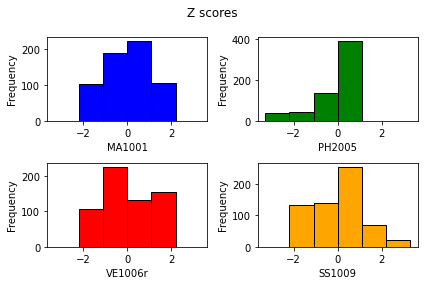

In [29]:
#Z scores histograms for MA1001, PH2005, VE1006r, SS1009
var_interest = ['MA1001','PH2005','VE1006r','SS1009']
ls_color = ['blue', 'green', 'red', 'orange']

for i in range (len(var_interest)):
    plt.subplot(2,2,i+1)
    plt.hist(df_zscores[var_interest[i]], color = ls_color[i], edgecolor = 'black',bins = 6,range=(-3.29,3.29))
    plt.suptitle('Z scores')
    plt.xlabel(var_interest[i])
    plt.ylabel('Frequency')
    plt.tight_layout()

<b>Bivariate relationship linearity</b>
<br>For TP1 only MA1001, PH2005, VE1006r and SS1009 will be tested for normality assumptions 

Bivariate relationship between PH2005 (as the DV) and MA1001 (as the IV)

Text(0, 0.5, 'Régression Résiduel standardisé')

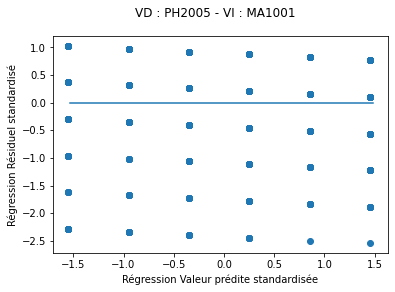

In [30]:
#Compute the scatter plot of the residuals

model1 = sm.OLS(df_tp.dropna()['PH2005'], sm.add_constant(df_tp.dropna()['MA1001'])).fit()
ypred1 = model1.predict()
standardized_yresid1 = preprocessing.scale(model1.resid)
standardized_ypred1 = preprocessing.scale(ypred1)
plt.scatter(standardized_ypred1, standardized_yresid1)
plt.plot([-1.53, 1.48],[0,0])
plt.suptitle('VD : PH2005 - VI : MA1001')
plt.xlabel('Régression Valeur prédite standardisée')
plt.ylabel('Régression Résiduel standardisé')

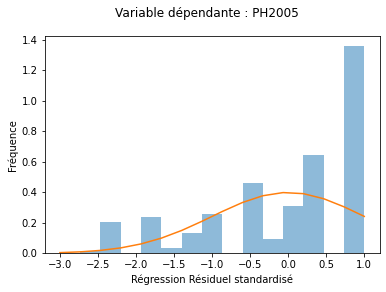

In [31]:
#Histogramm of the residuals

_, bins1, _ = plt.hist(standardized_yresid1, bins = 15, range=(-3,1), density = 1, alpha = 0.5)
mu1, sigma1 = stats.norm.fit(standardized_yresid1)
best_fit_line1 = stats.norm.pdf(bins1, mu1, sigma1)
plt.suptitle('Variable dépendante : PH2005')
plt.xlabel('Régression Résiduel standardisé')
plt.ylabel('Fréquence')
plt.plot(bins1, best_fit_line1)

Bivariate relationship between SS1009 (as the DV) and MA1001 (as the IV)

Text(0, 0.5, 'Régression Résiduel standardisé')

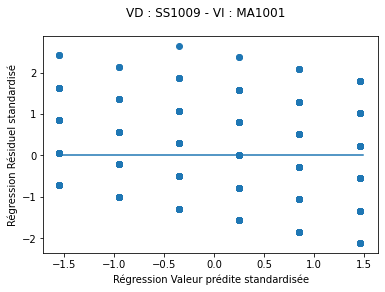

In [32]:
#Compute the scatter plot of the residuals

model2 = sm.OLS(df_tp.dropna()['SS1009'], sm.add_constant(df_tp.dropna()['MA1001'])).fit()
ypred2 = model2.predict()
standardized_yresid2 = preprocessing.scale(model2.resid)
standardized_ypred2 = preprocessing.scale(ypred2)
plt.scatter(standardized_ypred2, standardized_yresid2)
plt.plot([-1.51, 1.49], [0,0])
plt.suptitle('VD : SS1009 - VI : MA1001')
plt.xlabel('Régression Valeur prédite standardisée')
plt.ylabel('Régression Résiduel standardisé')

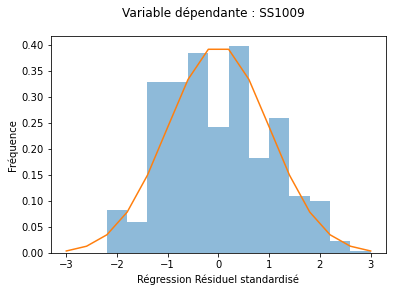

In [33]:
#Histogram of the residuals

_, bins2, _ = plt.hist(standardized_yresid2, bins = 15, range=(-3,3), density = 1, alpha = 0.5)
mu2, sigma2 = stats.norm.fit(standardized_yresid2)
best_fit_line2 = stats.norm.pdf(bins2, mu2, sigma2)
plt.suptitle('Variable dépendante : SS1009')
plt.xlabel('Régression Résiduel standardisé')
plt.ylabel('Fréquence')
plt.plot(bins2, best_fit_line2)

Bivariate relationship between VE1006r (as the DV) and MA1001 (as the IV)

Text(0, 0.5, 'Régression Résiduel standardisé')

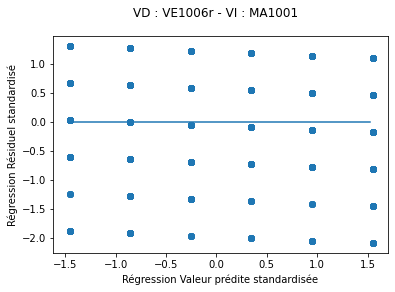

In [34]:
#Compute de the scatter plot of the residuals

model3 = sm.OLS(df_tp.dropna()['VE1006r'], sm.add_constant(df_tp.dropna()['MA1001'])).fit()
ypred3 = model3.predict()
standardized_yresid3 = preprocessing.scale(model3.resid)
standardized_ypred3 = preprocessing.scale(ypred3)
plt.scatter(standardized_ypred3, standardized_yresid3)
plt.plot([-1.47, 1.52], [0,0])
plt.suptitle('VD : VE1006r - VI : MA1001')
plt.xlabel('Régression Valeur prédite standardisée')
plt.ylabel('Régression Résiduel standardisé')

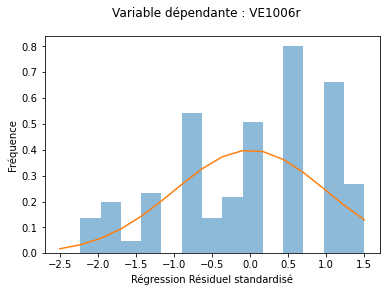

In [35]:
#Histogram of the residuals

_, bins3, _ = plt.hist(standardized_yresid3, bins = 15, range=(-2.5, 1.5), density = 1, alpha = 0.5)
mu3, sigma3 = stats.norm.fit(standardized_yresid3)
best_fit_line3 = stats.norm.pdf(bins3, mu3, sigma3)
plt.suptitle('Variable dépendante : VE1006r')
plt.xlabel('Régression Résiduel standardisé')
plt.ylabel('Fréquence')
plt.plot(bins3, best_fit_line3)

Bivariate relationship between SS1009 (as the DV) and PH2005 (as the IV)

Text(0, 0.5, 'Régression Résiduel standardisé')

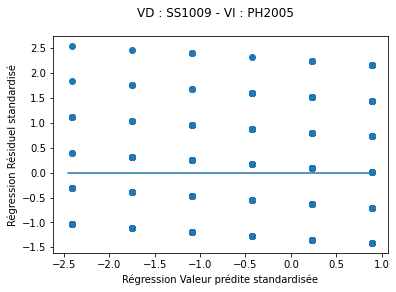

In [36]:
#Compute the scatter plot of the residuals

model4 = sm.OLS(df_tp.dropna()['SS1009'], sm.add_constant(df_tp.dropna()['PH2005'])).fit()
ypred4 = model4.predict()
standardized_yresid4 = preprocessing.scale(model4.resid)
standardized_ypred4 = preprocessing.scale(ypred4)
plt.scatter(standardized_ypred4, standardized_yresid4)
plt.plot([-2.45, 0.9], [0,0])
plt.suptitle('VD : SS1009 - VI : PH2005')
plt.xlabel('Régression Valeur prédite standardisée')
plt.ylabel('Régression Résiduel standardisé')

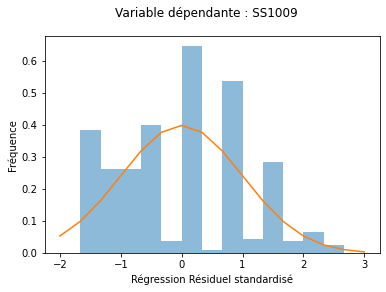

In [37]:
#Histogram of the residuals

_, bins4, _ = plt.hist(standardized_yresid4, bins = 15, range=(-2,3), density = 1, alpha = 0.5)
mu4, sigma4 = stats.norm.fit(standardized_yresid4)
best_fit_line4 = stats.norm.pdf(bins4, mu4, sigma4)
plt.suptitle('Variable dépendante : SS1009')
plt.xlabel('Régression Résiduel standardisé')
plt.ylabel('Fréquence')
plt.plot(bins4, best_fit_line4)

Bivariate relationship between VE1006r (as the DV) and PH2005 (as the IV)



Text(0, 0.5, 'Régression Résiduel standardisé')

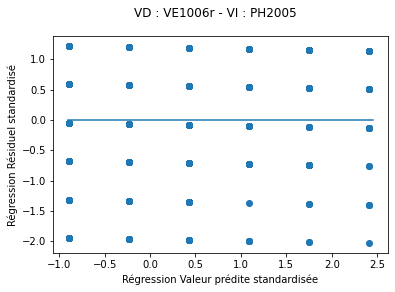

In [38]:
#Compute the scatter plot of the residuals

model5 = sm.OLS(df_tp.dropna()['VE1006r'], sm.add_constant(df_tp.dropna()['PH2005'])).fit()
ypred5 = model5.predict()
standardized_yresid5 = preprocessing.scale(model5.resid)
standardized_ypred5 = preprocessing.scale(ypred5)
plt.scatter(standardized_ypred5, standardized_yresid5)
plt.plot([-0.9, 2.45],[0,0])
plt.suptitle('VD : VE1006r - VI : PH2005')
plt.xlabel('Régression Valeur prédite standardisée')
plt.ylabel('Régression Résiduel standardisé')

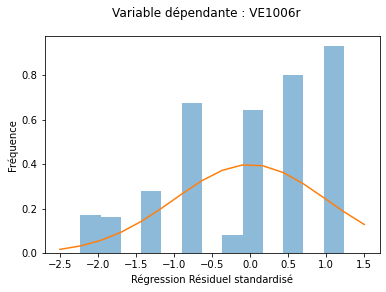

In [39]:
#Histogram of the residuals

_, bins5, _ = plt.hist(standardized_yresid5, bins = 15, range=(-2.5,1.5), density = 1, alpha = 0.5)
mu5, sigma5 = stats.norm.fit(standardized_yresid5)
best_fit_line5 = stats.norm.pdf(bins5, mu5, sigma5)
plt.suptitle('Variable dépendante : VE1006r')
plt.xlabel('Régression Résiduel standardisé')
plt.ylabel('Fréquence')
plt.plot(bins5, best_fit_line5)

Bivariate relationship between SS1009 (as the DV) and VE1006r (as the IV)

Text(0, 0.5, 'Régression Résiduel standardisé')

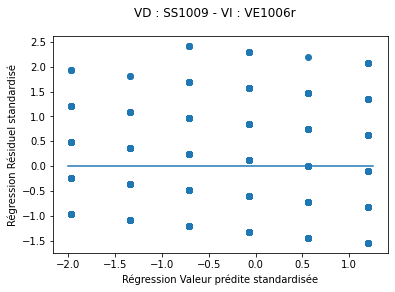

In [40]:
#Compute the scatter plot of the residuals

model6 = sm.OLS(df_tp.dropna()['SS1009'], sm.add_constant(df_tp.dropna()['VE1006r'])).fit()
ypred6 = model6.predict()
standardized_yresid6 = preprocessing.scale(model6.resid)
standardized_ypred6 = preprocessing.scale(ypred6)
plt.scatter(standardized_ypred6, standardized_yresid6)
plt.plot([-2,1.25], [0,0])
plt.suptitle('VD : SS1009 - VI : VE1006r')
plt.xlabel('Régression Valeur prédite standardisée')
plt.ylabel('Régression Résiduel standardisé')

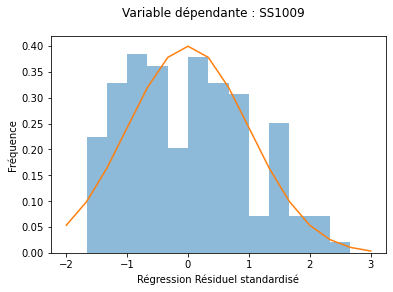

In [41]:
#Histogram of the residuals

_, bins6, _ = plt.hist(standardized_yresid6, bins = 15, range=(-2,3), density = 1, alpha = 0.5)
mu6, sigma6 = stats.norm.fit(standardized_yresid6)
best_fit_line6 = stats.norm.pdf(bins6, mu6, sigma6)
plt.suptitle('Variable dépendante : SS1009')
plt.xlabel('Régression Résiduel standardisé')
plt.ylabel('Fréquence')
plt.plot(bins6, best_fit_line6)

<b>Multivariate outliers</b>
<br>
<br> Mahalanobis Distance: D^2 = (x-m)^T . C^(-1) . (x-m)
<br>
<br> D^2 := Square of the Mahalanobis distance
<br> x := vector of the observations
<br> m := vector of mean values of IV
<br> C^(-1) := inverse covariance matrix of IV
<br> . := dot product

In [47]:
#Calculate multivariate outliers (mahalanobis distance)
#https://www.machinelearningplus.com/statistics/mahalanobis-distance/

def mahalanobis_outliers(x=None, data=None, cov=None, dfreed=None, sign = None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    data['mahal_square'] = np.power(md, 2)

    chi_critic = stats.chi2.ppf((1-sign), df = dfreed)

    ls_multioutliers = []

    for i in range (625):
        try:
            if data['mahal_square'][i] > chi_critic:
                ls_multioutliers.append(i+1)
        except:
            continue
    
    return data['mahal_square'], ls_multioutliers


mahal_sq, ls_multioutliers = mahalanobis_outliers(x = df_tp.dropna(), data = df_tp.dropna(), dfreed = len(df_tp.columns) - 1, sign = 0.001)

mahal_sq, ls_multioutliers

/home/anproulx/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


(0       27.890202
 1       39.823876
 2       20.649396
 3       27.715727
 4       27.878956
 5       80.358267
 6       33.938327
 7       19.759580
 8       31.311472
 9       22.439811
 10      34.388804
 11      45.693669
 12      31.625641
 13      18.788979
 14      17.832724
 15      48.848762
 16      35.369466
 17      53.355713
 18      15.562152
 19      35.306951
 20      71.638587
 21      40.369384
 22      45.394402
 23      34.232457
 24      23.924954
 26      14.662264
 28      32.362256
 29      14.951424
 31      21.831690
 32      22.091607
 33      27.145310
 34      30.384026
 35      27.668047
 36      36.339359
 37      21.988159
 38      45.966833
 39      38.629664
 40      31.388489
 41      10.520067
 42      38.444371
 43      43.271773
 44      13.606277
 45      28.621206
 46      39.155178
 47      23.952711
 48      13.238807
 49      13.636556
 50      22.495184
 51      21.433720
 52      86.050493
 53      32.645719
 54      61.174892
 55      94.

In [48]:
#calculate the % of multivariate outliers in our dataframe
percent_multivaroutliers_all = 100*len(ls_multioutliers)/625
percent_multivaroutliers = 100*len(ls_multioutliers)/len(df_tp.dropna()['MA1001'])
print('percentage of extreme scores over the sample: ', percent_multivaroutliers_all)
print('percentage of extreme scores excluding missing data: ', percent_multivaroutliers)

percentage of extreme scores over the sample:  7.36
percentage of extreme scores excluding missing data:  8.394160583941606


<b>Multicollinearity & Singularity</b>

VIF

In [49]:
#Compute the VIF
#Add a constant to the dataframe


#Create a dataframe
def compute_vif(data = None):
    vif_data = pd.DataFrame()
    vif_data['Features'] = data.columns
    #Compute VIF for each IVs
    vif_data['VIF'] = [variance_inflation_factor(data.values, i)
    for i in range(len(data.columns))]

    return vif_data

df_constant = add_constant(df_tp.dropna())
compute_vif(df_constant)

,Features,VIF
0,const,44.470267
1,MA1001,4.645117
2,MA1012r,4.517904
3,MA1023,2.522463
4,MA1034r,3.555179
5,MA1045,1.794249
6,MA1056r,3.943988
7,MA1067,4.753229
8,MA1078r,1.982331
9,MA1089,3.676130


In [50]:
#Compute the correlation matrix. By default, this function excludes NaN
#Check if the value is superior to 0.7 excluding the elements on the diagonal

def compute_corr(data = None, threshold = None):
    for i in range(len(data.columns)):
        for j in range(len(data.index)):
            if data.columns[i] != data.index[j]:
                if data[data.columns[i]][j] > threshold:
                    print(data.columns[i],", ", data.index[j], ": ", data[data.columns[i]][j])

df_corr = df_tp.dropna().corr(method = 'pearson')
compute_corr(data = df_corr, threshold = 0.7)

MA1001 ,  MA1012r :  0.7873272856563714
MA1001 ,  MA1034r :  0.7209393274008458
MA1001 ,  MA1056r :  0.7421111844873547
MA1001 ,  MA1067 :  0.8108623204180944
MA1001 ,  MA1089 :  0.7602587019857359
MA1012r ,  MA1001 :  0.7873272856563714
MA1012r ,  MA1034r :  0.7551930160442847
MA1012r ,  MA1056r :  0.7739498152643273
MA1012r ,  MA1067 :  0.7716846597832913
MA1012r ,  MA1089 :  0.7551342467020831
MA1034r ,  MA1001 :  0.7209393274008458
MA1034r ,  MA1012r :  0.7551930160442847
MA1034r ,  MA1056r :  0.7435056482622487
MA1034r ,  MA1067 :  0.7263584477806709
MA1034r ,  MA1089 :  0.7093110717636704
MA1056r ,  MA1001 :  0.7421111844873547
MA1056r ,  MA1012r :  0.7739498152643273
MA1056r ,  MA1034r :  0.7435056482622487
MA1056r ,  MA1067 :  0.7774845951064028
MA1067 ,  MA1001 :  0.8108623204180944
MA1067 ,  MA1012r :  0.7716846597832913
MA1067 ,  MA1034r :  0.7263584477806709
MA1067 ,  MA1056r :  0.7774845951064028
MA1067 ,  MA1089 :  0.7588770727865118
MA1089 ,  MA1001 :  0.7602587019857359

<b>Condition index</b>
<br>
<br> Formula taken from Kim, J.H. (2019). Multicollinearity and misleading statistical results. Koren journal of anesthesiology, 72(6), 558. https://doi.org/10.4097/kja.19087
<br>
<br>Ks = sqrt(lambda max / lambda s), where s = 1, 2, ..., k
<br>lambda : = eigenvalues
<br>s := number of eigenvalues
<br>Note. Eigenvalues are calculated from the X'X matrix



In [51]:
def compute_condind(data = None):
    ls_condind = []
    X_t = data.transpose()
    XX_t = X_t.dot(data)
    eig_XXt = np.linalg.eigvals(XX_t)
    for i in range (eig_XXt.shape[0]):
        ls_condind.append(math.sqrt(eig_XXt[0]/eig_XXt[i]))
    return ls_condind, len(ls_condind)
    

In [52]:
X = df_tp.dropna().to_numpy()
compute_condind(data = X)

([1.0,
  6.785235992281673,
  7.292562953970108,
  13.308620328224322,
  14.064797443421208,
  16.028897950711652,
  16.82879757366427,
  17.686901971253704,
  19.01270594798322,
  19.281527019178032,
  20.08175910098762,
  21.65619222638374,
  22.780819866354353,
  23.30396926056222,
  23.617713764199166,
  24.278548656089665,
  25.240840882266905,
  25.714337877598823,
  26.09204166703838,
  26.89213749716247,
  26.833646880202437,
  44.847091013065274,
  44.291019536645614,
  42.629136959889884,
  28.620611488093427,
  39.331076035677214,
  38.89117794502757,
  29.409623664191173,
  29.895882876739318,
  30.352943993642658,
  31.506600137846917,
  36.99452595749548,
  36.07713289072308,
  32.63138065320671,
  33.228444076137365,
  34.6565070789746,
  34.27696430516837,
  33.921633512766434],
 38)

<b>Variance proportion</b>
<br>
<br>Formula taken from Alin, A. (2010). Multicollinearity. Wiley Interdisciplinary Reviews: Computational Statistics, 2(3), 370-374. https://doi.org/10.1002/wics.84

In [53]:
#Compute variance proportions
def compute_vf(data=None, shape=None, list=None):
    X_t = data.transpose()
    XX_t = X_t.dot(data)
    eigval, eigvec = np.linalg.eig(XX_t)

    eig_array = np.empty(shape=(shape,shape), dtype='object')
    eig_array_vp = np.empty(shape=(shape,shape), dtype='object')

    for i in range (eigvec.shape[0]):
        for j in range (eigvec.shape[1]):
            eig_array[i][j] = (eigvec[i][j]**2)/eigval[i]

    eig_array_sum = np.sum(eig_array)

    for m in range (eigvec.shape[0]):
        for n in range (eigvec.shape[1]):
            eig_array_vp[m][n] = round(((eigvec[m][n]**2)/eigval[m])/eig_array_sum, 3)

    ls_columns = list
    ls_columns.insert(0, "constant")
    
    return pd.DataFrame(data = eig_array_vp, columns = ls_columns)


In [54]:
X_eig = add_constant(df_tp.dropna().to_numpy())
compute_vf(data = X_eig, shape = 39, list = df_tp.columns.tolist())

,constant,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0.001,0.001,0,0,0,0,0,0,0,0,0.001,0,0
8,0,0,0,0.001,0,0,0,0.001,0,0,0.001,0,0,0,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0,0.001,0,0,0,0,0,0.001,0,0,0,0.001


#### Determinant of correlation matrix

In [55]:
def compute_determinant_corr(df):
    x_corr = df.corr()
    corr_det = np.linalg.det(x_corr)
    return print(corr_det)

compute_determinant_corr(df)

3.3282331238004694e-12


> Le coefficient devrait être plus grand que .00001, mais ici il est plus petit. Ici, le déterminant est très petit (multicolinéarité) pcq mesure tous estime de soi. Mais pas surprenant, simplement le mentionner dans la discussion. C'est une limitation. 

### Factorability 

#### KMO 

In [56]:
df = df_tp.dropna() # drop NAN

In [57]:
def compute_kmo(df):
    kmo_all,kmo_model=calculate_kmo(df)
    print ("kmo score : " + str(kmo_model))

compute_kmo(df)

kmo score : 0.9406666321035712


>  0,94 : adequate for factor analysis, des valeurs au-dessus de .6 sont requises.  (Tabachnick & Fidel, 2013; au-dessus de .5 selon Williams, Onsman & Brown, 2010 

#### Test de Barlett

In [58]:
# Berlett test

def compute_berlett(df):
    chi_square_value,p_value=calculate_bartlett_sphericity(df)
    return print ("pval: " + str(p_value) + " /chi_square: " + str(chi_square_value))


compute_berlett(df)

pval: 0.0 /chi_square: 14339.769345672797


> La différence entre matrice de corrélation et matrice d'identité doit être significative, ici pval est de 0.0 donc significatif

#### Correlation matrix


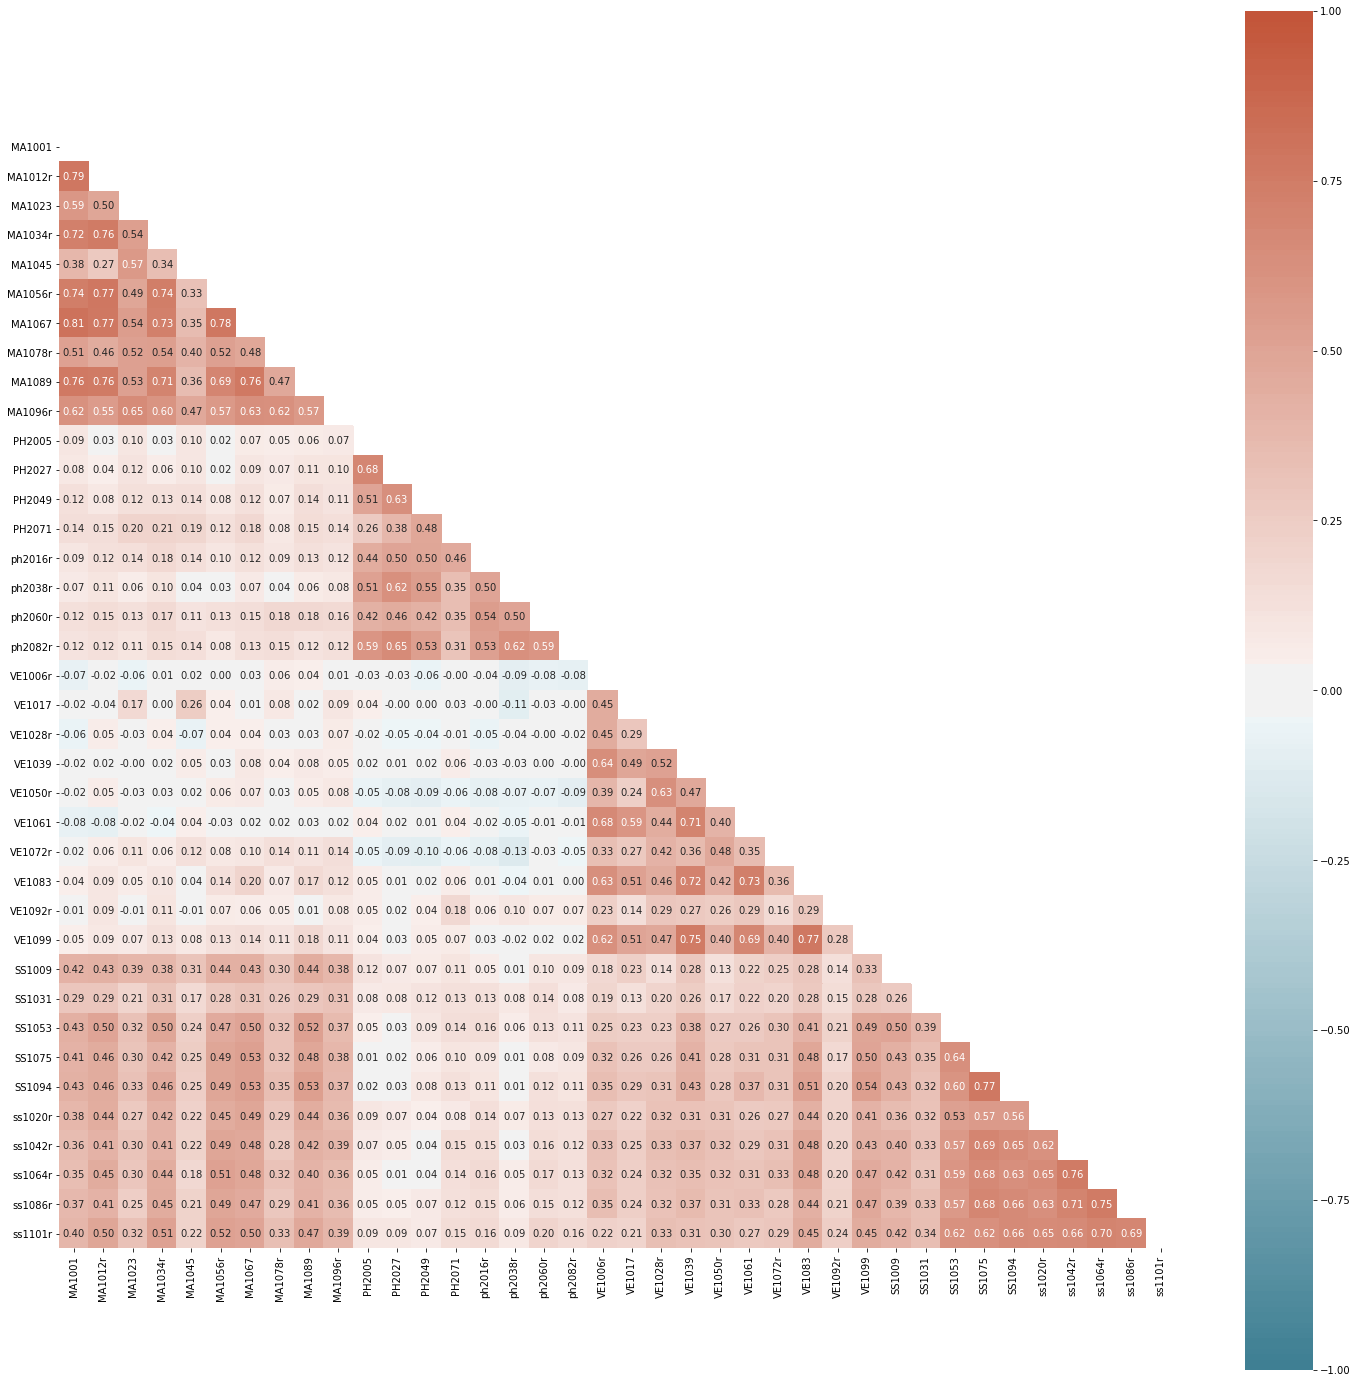

In [59]:
### Plot correlation matrix 
import seaborn as sns

plt.figure(figsize=(25,25))

# plot the heatmap for correlation matrix
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(correlation_matrix, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 mask=mask, square=True, 
                 annot=True, fmt='.2f')

In [60]:
columns = correlation_matrix.columns

In [61]:
# check if at least one value > 0.30
bool_corr = correlation_matrix > 0.30
bool_corr

,MA1001,MA1012r,MA1023,MA1034r,MA1045,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,PH2071,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1028r,VE1039,VE1050r,VE1061,VE1072r,VE1083,VE1092r,VE1099,SS1009,SS1031,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
MA1001,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True
MA1012r,True,True,True,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True
MA1023,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,True
MA1034r,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
MA1045,True,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
MA1056r,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True
MA1067,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True
MA1078r,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,True,False,True
MA1089,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True
MA1096r,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True


> Plusieurs corrélations > 0.30. The expected size depends, to some extent, on N (larger sample sizes tend to produce smaller correlations), but if no correlation exceeds .30, use of FA is questionable because there is probably nothing to factor analyze. Inspect R for correlations in excess of .30, and, if none is found, reconsider use of FA.(Tabachnick & Fidell)

### Communalities (moyenne des représentations initiales)

In [62]:
def compute_communalities_initial (df, col):
    
    X = df.loc[ : , df.columns != col]
    y = pd.DataFrame({col:df[col]})
    X = sm.add_constant(X)
    results = sm.OLS(y, X).fit()
    rsquared = results.rsquared
    
    return rsquared

def compute_mean_communalities (communalities_1D):
    mean = "La moyenne des représentation initiales {}".format(communalities_1D.mean())
    
    return mean

In [63]:
r2 = []
for col in df.columns :
    
    rsquared = compute_communalities_initial(df, col)
    r2.append(rsquared)
    
repr_quality = pd.DataFrame()
repr_quality ["variable"] = df.columns 
repr_quality ["communalities"] = r2 

repr_quality

,variable,communalities
0,MA1001,0.784720
1,MA1012r,0.778658
2,MA1023,0.603562
3,MA1034r,0.718720
4,MA1045,0.442664
5,MA1056r,0.746450
6,MA1067,0.789617
7,MA1078r,0.495543
8,MA1089,0.727975
9,MA1096r,0.623023


In [18]:
# Moyenne de la qualité des représentation initiale 
compute_mean_communalities (repr_quality["communalities"])

'La moyenne des représentation initiales 0.592498555682566'

> La qualité de la représentation est < 0.7 , McCallum et al., 1999, valeur recommandée. Nous prenons ici la décision de retirer les items < 0.3 pour augmenter la qualité des représentations

### Remove items with initial communality < 0.3

*Item 1*

In [64]:
communalities = repr_quality["communalities"]

ft_comm_crit = list(communalities[communalities < 0.3].sort_values(0).index)
rmv_item = [*range(0,len(ft_comm_crit), 1)]
col_rmv_item = repr_quality["variable"][repr_quality.index == ft_comm_crit[0]]
df_rmv = df.drop(columns = col_rmv_item)

print("Item removed is index {}".format(col_rmv_item))

Item removed is index 26    VE1092r
Name: variable, dtype: object


> Recalculons maintenant la qualité des représentation initiale (moyenne)

In [65]:
r2 = []
for col in df_rmv.columns :
    
    rsquared = compute_communalities_initial(df_rmv, col)
    r2.append(rsquared)
    
repr_quality_item1rmv = pd.DataFrame()
repr_quality_item1rmv ["variable"] = df_rmv.columns 
repr_quality_item1rmv ["communalities"] = r2 

repr_quality_item1rmv

,variable,communalities
0,MA1001,0.784695
1,MA1012r,0.777441
2,MA1023,0.602409
3,MA1034r,0.717651
4,MA1045,0.442231
5,MA1056r,0.746441
6,MA1067,0.789411
7,MA1078r,0.495457
8,MA1089,0.722488
9,MA1096r,0.621898


In [66]:
compute_mean_communalities (repr_quality_item1rmv["communalities"])

'La moyenne des représentation initiales 0.6013185444515361'

> Continuons jusqu'à ne plus avoir d'items dont la qtl de représentation initiale est < 0.30

*Item 2*

In [67]:
communalities = repr_quality_item1rmv["communalities"]

ft_comm_crit = list(communalities[communalities < 0.3].sort_values(0).index)
rmv_item = [*range(0,len(ft_comm_crit), 1)]
col_rmv_item = repr_quality_item1rmv["variable"][repr_quality_item1rmv.index == ft_comm_crit[0]]
df_rmv_item2 = df_rmv.drop(columns = col_rmv_item)

print("Item removed is index {}".format(col_rmv_item))

Item removed is index 28    SS1031
Name: variable, dtype: object


In [68]:
r2 = []
for col in df_rmv_item2.columns :
    
    rsquared = compute_communalities_initial(df_rmv_item2, col)
    r2.append(rsquared)
    
repr_quality_item2rmv = pd.DataFrame()
repr_quality_item2rmv ["variable"] = df_rmv_item2.columns 
repr_quality_item2rmv ["communalities"] = r2 

repr_quality_item2rmv

,variable,communalities
0,MA1001,0.783474
1,MA1012r,0.777369
2,MA1023,0.601823
3,MA1034r,0.717077
4,MA1045,0.442010
5,MA1056r,0.746298
6,MA1067,0.789251
7,MA1078r,0.494271
8,MA1089,0.722060
9,MA1096r,0.619051


In [69]:
qlt_repr_init = compute_mean_communalities (repr_quality_item2rmv["communalities"])
qlt_repr_init

'La moyenne des représentation initiales 0.6103910391235944'

In [70]:
communalities = repr_quality_item2rmv["communalities"]
ft_comm_crit = list(communalities[communalities < 0.3].sort_values(0).index)

if ft_comm_crit == []:
    print("Il n'y a plus d'items avec une qualité de représentation initiale plus faible que 0,3")
else: 
    print ("Continuer à retirer des items")

Il n'y a plus d'items avec une qualité de représentation initiale plus faible que 0,3


> Avant de continuer, il est nécessaire de recalculer le déterminant, kmo et barlett avec le nouveau dataframe, duquel a été retiré items avec de plus faibles représentations

In [71]:
compute_determinant_corr(df_rmv_item2)
compute_kmo(df_rmv_item2)
compute_berlett(df_rmv_item2)

3.84527637226869e-12
kmo score : 0.9401825420134133
pval: 0.0 /chi_square: 14075.25378364041


> Postulat de factorabilité est toujours respecté, poursuivons. 

### Méthode d'extraction et justification

Nous avons choisi ML, puisqu'étant donné le postulat de normalité varié, cette méthode donne moins de poids au items plus faible, considère l'erreur échantillonnage. 

### Pick n factors 

#### Critère de Kaiser

In [72]:
def check_kaiser (n_factor, method, df):
    
    fa = FactorAnalyzer(n_factors=n_factor, rotation=None, method=method)
    fa.fit(df)
    
    # Get Eigenvalues
    ev, v = fa.get_eigenvalues()
    df_ev = pd.DataFrame(data = ev).rename(columns = {0: "eigenvalues"})
    df_ev.index = df_ev.index + 1
    
    return ev, df_ev


ev, df_ev = check_kaiser (25, "ml", df_rmv_item2)
df_ev

,eigenvalues
1,11.138797
2,5.522202
3,4.089780
4,1.653834
5,1.151814
6,1.048644
7,0.890933
8,0.785026
9,0.699901
10,0.612056


In [74]:
# Critère de Kaiser:  factors greater than 1. However note it tends to overextract the number of factors

nb_factors = df_ev[df_ev['eigenvalues'] < 1].index[0]-1
print ("The maximum number of factors (eigenvalues greater than 1) is  " + str(nb_factors))

The maximum number of factors (eigenvalues greater than 1) is  6


#### Test coude Cattell

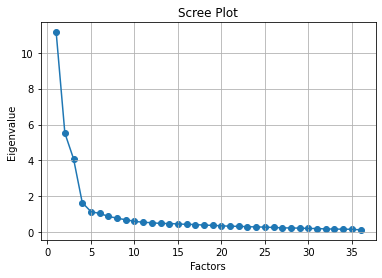

In [75]:
# plot
def scree_plot(df, ev):
    plt.scatter(range(1,df.shape[1]+1),ev)
    plt.plot(range(1,df.shape[1]+1),ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()
    
    return plt.show()

scree_plot(df_rmv_item2, ev)

> Keep factors before inflexion point. Eigenvalues for the first four factors are larger, and, after the fourth factor, changes in successive eigenvalues are small. 

> This is taken as evidence that there are probably between four and six factors. The scree plot visually suggests breaks between four factors. 

> Results from scree plot are consistent with earlier research suggesting four factors on the questionnaire.

> Note scree plot is more subjective. We will look at solutions for [4,5,6] factors to decide upon best n factors. 

### Evaluate the quality of FA solutions for [4,5,6] n factors

In [76]:
# Communalities are inspected to see if the variables are well defined by the solution. Communalities indicate the percent of variance in a variable that overlaps variance in the factors. 

def evaluate_solution(n_factors, rotation, method, df):
    fa = FactorAnalyzer(n_factors = n_factors, rotation = rotation, method = method)
    fa.fit(df)
    
    #communalities
    communalities = pd.DataFrame(fa.get_communalities(), index = df.columns)
    ft_comm = list(communalities[communalities[0]< 0.3].sort_values(0).index)
    comm_diagnosis = "Total variables with communalities < 0.3 :" + str(len(ft_comm)) 
    
    mean_comm = communalities[0].mean()
    min_comm = communalities[0].min()
    max_comm = communalities[0].max()
    
    des_communalities = "mean = {}, min = {}, max = {})".format(mean_comm, min_comm, max_comm)

    
    #loadings/saturations
    df_loadings = pd.DataFrame(fa.loadings_, columns = ['fa{}'.format(i) for i in range (1, n_factors+1)], index = df.columns)
    df_loadings["highest loading"] = df_loadings.idxmax(axis=1) 
    df_loadings = df_loadings.sort_values("highest loading")
    
    mean_sat = fa.loadings_.mean()
    min_sat = fa.loadings_.min()
    max_sat = fa.loadings_.max()
    
    des_loadings = "mean = {}, min = {}, max = {})".format(mean_sat, min_sat, max_sat)
    
    #interpretabilité des facteurs
    interpretability_diagnosis = ""
    
    if rotation != None:
        for row in df_loadings.T:
            column = df_loadings.T[row]
            column = column[['fa{}'.format(i) for i in range (1, n_factors+1)]].abs() #.sort_values()
            
            # if highest saturation < 0.40, print non-interprétable
            ord_fa = np.sort(column.values)
    
            if ord_fa[-1] < 0.40 :
                interpretability_diagnosis += "Saturation non-interprétable variable " + str(row) + " ; "
    
    # facteurs bien définis : 1-2 saturations élevées (au dessus de .80)            
    factors = ['fa{}'.format(i) for i in range (1, n_factors+1)]
    diagnosis_quality_factors = ""
    
    for factor in factors:
        df_loadings[df_loadings["highest loading"] == factor]
        count = len(df_loadings[df_loadings[factor]> 0.8])
    
        diagnosis_quality_factors += "There are " + str(count) + " factors > 0.8 for " + str(factor) + " ; "
    
    #saturations croisées diagnosis
    count = 0 

    for row in df_loadings.T:
        column = df_loadings.T[row]
        column_names = ['fa{}'.format(i) for i in range (1, n_factors)]
        column = column[column_names].abs() #.sort_values()

        # if second greatest value > 0.35 , 
        ord_fa = np.sort(column.values)
    
        if ord_fa[-2] > 0.35 :
            saturation_diagnosis = "Problème de saturation croisée pour la variable " + str(row)
            count+=1

    if count == 0:
        saturation_diagnosis = "Pas de problème de saturations croisées"
        
    
    #residuals
    if rotation != None:
        factor_correlation_matrix=fa.phi_
        pattern_matrix= fa.loadings_
        pattern_matrix_transpose= np.transpose(fa.loadings_)
        structure_matrix = fa.structure_
        reproduced_correlation_matrix= pattern_matrix.dot((factor_correlation_matrix).dot(pattern_matrix_transpose))
        residuals=fa.corr_ - reproduced_correlation_matrix
        df_residuals=pd.DataFrame(residuals)
        df_residuals_abs = df_residuals.abs()
    
        count_res = 0
        for row in df_residuals_abs:
            for col in df_residuals_abs:
                res = df_residuals_abs[row][col]
                
                if res < 0.05:
                    count_res+=1
                    
        proportion_res = count_res/(df_residuals_abs.shape[0]*df_residuals_abs.shape[1])
        if proportion_res < 0.50:
            residuals_diagnosis= "Pass,  less than 50% are > 0.05. Proportion = {}".format(proportion_res)
        else:
            residuals_diagnosis = "problem, more than 50% are > 0.05. Residuals = {}".formation(proportion_res)
    
    else:
        df_residuals=None
        factor_correlation_matrix = None
        pattern_matrix = fa.loadings_
        structure_matrix = fa.structure_
        reproduced_correlation_matrix = None
        residuals = None
        df_residuals = None
        proportion_res = None
        residuals_diagnosis = None
        
    #variance
    variance = fa.get_factor_variance()
    variance = pd.DataFrame (variance)
    variance.index = ["loadings", "proportion var", "cumulative var"]
    variance.columns = ['fa{}'.format(i) for i in range (1, n_factors+1)]
    
    variance_explained  = variance["fa{}".format(n_factors)]["cumulative var"].max() 
    
    if variance_explained > 0.50:
        variance_diagnosis = "Factors explain more than 50% of common variance"
    
    else :
        variance_diagnosis = "Factors explain less than 50% of common variance"
    
    #eigenvalues
    ev, v = fa.get_eigenvalues()
    df_ev = pd.DataFrame(data = ev).rename(columns = {0: "eigenvalues"})
    df_ev.index = df_ev.index + 1
    
    #uniqueness
    df_uniqueness = pd.DataFrame (fa.get_uniquenesses())
    
    #qualité des facteurs
    count_items_per_factor = pd.DataFrame(df_loadings["highest loading"].value_counts())
    
    return  communalities, ft_comm, comm_diagnosis, des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor


In [79]:
n_factors = [4, 5, 6]

#### 6 factors

In [83]:
communalities, ft_comm, comm_diagnosis,  des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(6, "oblimin", "ml", df_rmv_item2)

to_print = [communalities, ft_comm, comm_diagnosis, des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor]
label_to_print = ["communalities", "index comm < 0.3", "communalities diagnosis", "describe communalities",  "df_loadings", "describe loadings", "interpretability of factors", "quality of factors, items/factor" , "saturation_diagnosis", "factor_correlation_matrix", "pattern_matrix", "structure_matrix", "reproduced_correlation_matrix", "df_residuals", "proportion_residuals_over_0.05", "residuals_diagnosis", "variance", "variance_explained", "variance_diagnosis", "eigenvalues", "df_uniqueness", "count_items_per_factor"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.814410
MA1012r  0.845987
MA1023   0.519911
MA1034r  0.544357
MA1045   0.502011
MA1056r  0.567001
MA1067   0.678156
MA1078r  0.296462
MA1089   0.687894
MA1096r  0.427717
PH2005   0.546692
PH2027   0.718967
PH2049   0.550509
PH2071   0.230846
ph2016r  0.477973
ph2038r  0.617829
ph2060r  0.436714
ph2082r  0.638566
VE1006r  0.487159
VE1017   0.529706
VE1028r  0.546862
VE1039   0.646233
VE1050r  0.522702
VE1061   0.722666
VE1072r  0.272177
VE1083   0.624862
VE1099   0.620355
SS1009   0.191526
SS1053   0.329420
SS1075   0.529458
SS1094   0.432227
ss1020r  0.386682
ss1042r  0.683626
ss1064r  0.785544
ss1086r  0.664693
ss1101r  0.503476


index comm < 0.3


['SS1009', 'PH2071', 'VE1072r', 'MA1078r']


communalities diagnosis


Total variables with communalities < 0.3 :4


describe communalities


mean = 0.5439271590806602, min = 0.19152574577245446, max = 0.8459865481364434)


df_loadings


              fa1       fa2       fa3       fa4       fa5

> Voir différence avec la qualité de la représentation initiale

In [91]:
# qualité repr initiale - qualité après extraction
diff_communality_6 = 0.6103910391235944 - 0.5439271590806602 #0.6214422425288526
diff_communality_6

0.06646388004293413

#### 5 factors

In [92]:
communalities, ft_comm, comm_diagnosis, des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(5, "oblimin", "ml", df_rmv_item2)

to_print = [communalities, ft_comm, comm_diagnosis, des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor]
label_to_print = ["communalities", "ind < 0.3 communalities", "communalities diagnosis", "describe communalities",  "df_loadings", "describe loadings", "interpretability of factors", "quality of factors, items/factor" , "saturation_diagnosis", "factor_correlation_matrix", "pattern_matrix", "structure_matrix", "reproduced_correlation_matrix", "df_residuals", "proportion_residuals_over_0.05", "residuals_diagnosis", "variance", "variance_explained", "variance_diagnosis", "eigenvalues", "df_uniqueness", "count_items_per_factor"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.832348
MA1012r  0.829777
MA1023   0.524437
MA1034r  0.543214
MA1045   0.507551
MA1056r  0.575311
MA1067   0.692363
MA1078r  0.273704
MA1089   0.701654
MA1096r  0.377059
PH2005   0.545785
PH2027   0.721951
PH2049   0.559223
PH2071   0.229013
ph2016r  0.482839
ph2038r  0.601125
ph2060r  0.435163
ph2082r  0.635951
VE1006r  0.565844
VE1017   0.522642
VE1028r  0.276875
VE1039   0.755992
VE1050r  0.237030
VE1061   0.793462
VE1072r  0.234698
VE1083   0.652148
VE1099   0.641738
SS1009   0.185301
SS1053   0.313677
SS1075   0.443265
SS1094   0.378717
ss1020r  0.417765
ss1042r  0.707662
ss1064r  0.815094
ss1086r  0.664149
ss1101r  0.535568


ind < 0.3 communalities


['SS1009', 'PH2071', 'VE1072r', 'VE1050r', 'MA1078r', 'VE1028r']


communalities diagnosis


Total variables with communalities < 0.3 :6


describe communalities


mean = 0.5336137606381498, min = 0.1853014603910281, max = 0.8323482385025885)


df_loadings


              fa1       fa2  

In [131]:
diff_communalities_5 = 0.6103910391235944 - 0.5336137606381498
diff_communalities_5

0.07677727848544458

#### 4 factors

In [93]:
communalities, ft_comm, comm_diagnosis, des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(4, "oblimin", "ml", df_rmv_item2)

to_print = [communalities, ft_comm, comm_diagnosis, des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor]
label_to_print = ["communalities", "index <0.3 communalities", "communalities diagnosis", "describe communalities",  "df_loadings", "describe loadings", "interpretability of factors", "quality of factors, items/factor" , "saturation_diagnosis", "factor_correlation_matrix", "pattern_matrix", "structure_matrix", "reproduced_correlation_matrix", "df_residuals", "proportion_residuals_over_0.05", "residuals_diagnosis", "variance", "variance_explained", "variance_diagnosis", "eigenvalues", "df_uniqueness", "count_items_per_factor"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.928800
MA1012r  0.676275
MA1023   0.530259
MA1034r  0.608510
MA1045   0.282327
MA1056r  0.606980
MA1067   0.711862
MA1078r  0.370211
MA1089   0.714728
MA1096r  0.506075
PH2005   0.548828
PH2027   0.722757
PH2049   0.554225
PH2071   0.234901
ph2016r  0.480037
ph2038r  0.576021
ph2060r  0.436664
ph2082r  0.638901
VE1006r  0.556043
VE1017   0.450305
VE1028r  0.287317
VE1039   0.724293
VE1050r  0.247959
VE1061   0.806635
VE1072r  0.186459
VE1083   0.621774
VE1099   0.632031
SS1009   0.244611
SS1053   0.315085
SS1075   0.444425
SS1094   0.384390
ss1020r  0.423636
ss1042r  0.660546
ss1064r  0.789140
ss1086r  0.657732
ss1101r  0.541949


index <0.3 communalities


['VE1072r', 'PH2071', 'SS1009', 'VE1050r', 'MA1045', 'VE1028r']


communalities diagnosis


Total variables with communalities < 0.3 :6


describe communalities


mean = 0.5306302362444398, min = 0.18645871626947982, max = 0.9287995134699805)


df_loadings


              fa1       fa2 

In [94]:
diff_communalities = 0.6103910391235944 - 0.5306302362444398 #0.5722324166216669

diff_communalities

0.07976080287915455

> Nous sélectionnons la solution avec 4 items comme elle est concordante avec les dimensions du questionnaire. Globalement, les solutions sont pas mal semblables, mais les facteurs sont mieux définis et interprétables pour un n facteur = 4.

> Nous pouvons voir que d'entre les variables 6 ont une faible qualité de représentation (< 0.30) Nous allons donc les retirer une à une, itérativement , et recalculer le kmo, déterminant et résultat au test de Barlett. 


### Retrait d'items avec faible représentation après extraction

*item 1*

In [95]:
# remove items with communalities < 0.3 et si >= 1 (cas Heywood)

rmv_item = [*range(0,len(ft_comm), 1)]
df_rmv_third_item = df_rmv_item2.drop(columns = ft_comm[rmv_item[0]])

communalities, ft_comm, comm_diagnosis,  des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(4, "oblimin", "ml", df_rmv_third_item)

to_print = [communalities, ft_comm]
label_to_print = ["communalities", "index <0.3 communalities"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.928206
MA1012r  0.675242
MA1023   0.533116
MA1034r  0.607634
MA1045   0.283968
MA1056r  0.605655
MA1067   0.710973
MA1078r  0.371777
MA1089   0.714425
MA1096r  0.507853
PH2005   0.549619
PH2027   0.723264
PH2049   0.553196
PH2071   0.233869
ph2016r  0.478902
ph2038r  0.575412
ph2060r  0.436747
ph2082r  0.639984
VE1006r  0.555670
VE1017   0.448790
VE1028r  0.283050
VE1039   0.723615
VE1050r  0.241623
VE1061   0.804880
VE1083   0.624181
VE1099   0.631542
SS1009   0.243841
SS1053   0.314644
SS1075   0.446369
SS1094   0.385609
ss1020r  0.424589
ss1042r  0.662631
ss1064r  0.791033
ss1086r  0.663130
ss1101r  0.542609


index <0.3 communalities


['PH2071', 'VE1050r', 'SS1009', 'VE1028r', 'MA1045']


*Item 2*

In [96]:
rmv_item = [*range(0,len(ft_comm), 1)]
df_rmv_fourth_item = df_rmv_third_item.drop(columns = ft_comm[rmv_item[0]])

communalities, ft_comm, comm_diagnosis,  des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(4, "oblimin", "ml", df_rmv_fourth_item)

to_print = [communalities, ft_comm]
label_to_print = ["communalities", "index <0.3 communalities"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.929761
MA1012r  0.675203
MA1023   0.532610
MA1034r  0.607439
MA1045   0.282443
MA1056r  0.604977
MA1067   0.711209
MA1078r  0.372717
MA1089   0.715656
MA1096r  0.508605
PH2005   0.563283
PH2027   0.729071
PH2049   0.533592
ph2016r  0.461983
ph2038r  0.574511
ph2060r  0.432596
ph2082r  0.651634
VE1006r  0.555835
VE1017   0.448687
VE1028r  0.282858
VE1039   0.723247
VE1050r  0.240768
VE1061   0.805105
VE1083   0.624336
VE1099   0.631463
SS1009   0.244324
SS1053   0.314852
SS1075   0.446423
SS1094   0.385738
ss1020r  0.423615
ss1042r  0.663533
ss1064r  0.792359
ss1086r  0.663790
ss1101r  0.542805


index <0.3 communalities


['VE1050r', 'SS1009', 'MA1045', 'VE1028r']


*Item 3*

In [97]:
rmv_item = [*range(0,len(ft_comm), 1)]
df_rmv_fifth_item = df_rmv_fourth_item.drop(columns = ft_comm[rmv_item[0]])

communalities, ft_comm, comm_diagnosis,  des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(4, "oblimin", "ml", df_rmv_fifth_item)

to_print = [communalities, ft_comm]
label_to_print = ["communalities", "index <0.3 communalities"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.933174
MA1012r  0.676799
MA1023   0.533300
MA1034r  0.607392
MA1045   0.282531
MA1056r  0.603973
MA1067   0.711591
MA1078r  0.373049
MA1089   0.715907
MA1096r  0.511045
PH2005   0.563702
PH2027   0.729982
PH2049   0.533725
ph2016r  0.460772
ph2038r  0.575705
ph2060r  0.431691
ph2082r  0.650758
VE1006r  0.554078
VE1017   0.448279
VE1028r  0.269664
VE1039   0.715546
VE1061   0.802519
VE1083   0.626008
VE1099   0.633525
SS1009   0.242413
SS1053   0.314659
SS1075   0.451566
SS1094   0.388020
ss1020r  0.423433
ss1042r  0.668373
ss1064r  0.799581
ss1086r  0.670329
ss1101r  0.543584


index <0.3 communalities


['SS1009', 'VE1028r', 'MA1045']


*Item 4*

In [98]:
rmv_item = [*range(0,len(ft_comm), 1)]
df_rmv_sixth_item = df_rmv_fifth_item.drop(columns = ft_comm[rmv_item[0]])

communalities, ft_comm, comm_diagnosis,  des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(4, "oblimin", "ml", df_rmv_sixth_item)

to_print = [communalities, ft_comm]
label_to_print = ["communalities", "index <0.3 communalities"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.933378
MA1012r  0.676087
MA1023   0.523629
MA1034r  0.609257
MA1045   0.273679
MA1056r  0.602738
MA1067   0.715834
MA1078r  0.371942
MA1089   0.717568
MA1096r  0.508651
PH2005   0.562759
PH2027   0.729933
PH2049   0.534830
ph2016r  0.459738
ph2038r  0.575099
ph2060r  0.431510
ph2082r  0.650689
VE1006r  0.556571
VE1017   0.443261
VE1028r  0.268609
VE1039   0.713634
VE1061   0.805003
VE1083   0.629609
VE1099   0.632941
SS1053   0.314543
SS1075   0.452406
SS1094   0.388587
ss1020r  0.422743
ss1042r  0.670261
ss1064r  0.802334
ss1086r  0.670352
ss1101r  0.544310


index <0.3 communalities


['VE1028r', 'MA1045']


*Item 5*

In [99]:
rmv_item = [*range(0,len(ft_comm), 1)]
df_rmv_seventh_item = df_rmv_sixth_item.drop(columns = ft_comm[rmv_item[0]])

communalities, ft_comm, comm_diagnosis,  des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(4, "oblimin", "ml", df_rmv_seventh_item)

to_print = [communalities, ft_comm]
label_to_print = ["communalities", "index <0.3 communalities"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.936151
MA1012r  0.679888
MA1023   0.525365
MA1034r  0.611415
MA1045   0.272232
MA1056r  0.602337
MA1067   0.715740
MA1078r  0.373345
MA1089   0.717928
MA1096r  0.511379
PH2005   0.562598
PH2027   0.729864
PH2049   0.534776
ph2016r  0.459110
ph2038r  0.575564
ph2060r  0.431368
ph2082r  0.650642
VE1006r  0.551540
VE1017   0.442428
VE1039   0.701637
VE1061   0.801944
VE1083   0.630896
VE1099   0.631272
SS1053   0.315358
SS1075   0.458464
SS1094   0.390289
ss1020r  0.423168
ss1042r  0.675716
ss1064r  0.809803
ss1086r  0.677541
ss1101r  0.544423


index <0.3 communalities


['MA1045']


*Item 6*

In [100]:
rmv_item = [*range(0,len(ft_comm), 1)]
df_rmv_eighth_item = df_rmv_seventh_item.drop(columns = ft_comm[rmv_item[0]])

communalities, ft_comm, comm_diagnosis,  des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(4, "oblimin", "ml", df_rmv_eighth_item)

to_print = [communalities, ft_comm]
label_to_print = ["communalities", "index <0.3 communalities"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])



communalities


                0
MA1001   0.956073
MA1012r  0.701181
MA1023   0.480109
MA1034r  0.617120
MA1056r  0.606974
MA1067   0.730747
MA1078r  0.353773
MA1089   0.735627
MA1096r  0.486806
PH2005   0.563554
PH2027   0.732874
PH2049   0.537047
ph2016r  0.460308
ph2038r  0.574879
ph2060r  0.431057
ph2082r  0.649999
VE1006r  0.555607
VE1017   0.420363
VE1039   0.710482
VE1061   0.806432
VE1083   0.637632
VE1099   0.635269
SS1053   0.312570
SS1075   0.458752
SS1094   0.387631
ss1020r  0.423246
ss1042r  0.688468
ss1064r  0.819830
ss1086r  0.685282
ss1101r  0.543815


index <0.3 communalities


[]


<b>Assumptions check after removing items</b>

In [63]:
#Create a dataframe without the items that have been removed
removed_items = ['MA1045', 'PH2071', 'VE1028r', 'VE1050r', 'VE1072r', 'VE1092r', 'SS1009', 'SS1031']
df_final = df_tp.drop(removed_items, axis = 1)
df_final.head()

,MA1001,MA1012r,MA1023,MA1034r,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1039,VE1061,VE1083,VE1099,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,4.0,4.0,2.0,6.0,4.0,4.0,6.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,5.0,3.0,3.0,4.0,4.0
1,5.0,6.0,5.0,6.0,6.0,5.0,6.0,5.0,6.0,5.0,5.0,4.0,6.0,6.0,6.0,6.0,5.0,1.0,2.0,1.0,1.0,2.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0
2,5.0,6.0,3.0,6.0,6.0,5.0,6.0,3.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
3,4.0,4.0,3.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,6.0,6.0,5.0,6.0,6.0,6.0,3.0,6.0,4.0,5.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
4,6.0,6.0,5.0,6.0,6.0,6.0,6.0,4.0,6.0,4.0,4.0,1.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,3.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


Multivariate normality

In [74]:
mahalanobis_outliers(x = df_final.dropna(), data = df_final.dropna(), dfreed = len(df_final.columns) - 1, sign = 0.001)

(0       21.384512
 1       23.482181
 2       17.027506
 3       21.368465
 4       21.511200
 5       72.992343
 6       23.044309
 7       14.670148
 8       23.505623
 9       19.711603
 10      19.761011
 11      32.002915
 12      22.723986
 13      13.907119
 14      15.040125
 15      33.928996
 16      22.269186
 17      30.868269
 18      11.188148
 19      27.361860
 20      58.127665
 21      37.939322
 22      39.920564
 23      17.430535
 24      18.716489
 26      11.131160
 28      18.352979
 29      11.303024
 31      20.333973
 32      16.769572
 33      17.785984
 34      17.405296
 35      19.275212
 36      29.073908
 37      14.634562
 38      26.461572
 39      28.816031
 40      28.655602
 41       7.469497
 42      27.847608
 43      28.593263
 44      10.227721
 45      24.410103
 46      35.033306
 47      17.519014
 48      10.934472
 49      12.616114
 50      21.161652
 51      18.762575
 52      79.487714
 53      27.051458
 54      49.427403
 55      85.

In [217]:
#Compute the VIF
#Add a constant to the dataframe

compute_vif(add_constant(df_final.dropna()))

,Features,VIF
0,const,37.476987
1,MA1001,4.516617
2,MA1012r,4.303977
3,MA1023,2.207218
4,MA1034r,3.486592
5,MA1056r,3.907024
6,MA1067,4.706390
7,MA1078r,1.967147
8,MA1089,3.573498
9,MA1096r,2.571100


In [91]:
#Compute correlation

df_final_corr = df_final.dropna().corr(method = 'pearson')
compute_corr(data = df_final_corr, threshold = 0.7)

MA1001 ,  MA1012r :  0.7846718194288931
MA1001 ,  MA1034r :  0.719587835972243
MA1001 ,  MA1056r :  0.741339977039741
MA1001 ,  MA1067 :  0.8099545304124987
MA1001 ,  MA1089 :  0.7604960241652045
MA1012r ,  MA1001 :  0.7846718194288931
MA1012r ,  MA1034r :  0.7552242949333103
MA1012r ,  MA1056r :  0.773770463613367
MA1012r ,  MA1067 :  0.7712185702919395
MA1012r ,  MA1089 :  0.7554580495349518
MA1034r ,  MA1001 :  0.719587835972243
MA1034r ,  MA1012r :  0.7552242949333103
MA1034r ,  MA1056r :  0.7449330741853617
MA1034r ,  MA1067 :  0.7264435456720455
MA1034r ,  MA1089 :  0.710488788443865
MA1056r ,  MA1001 :  0.741339977039741
MA1056r ,  MA1012r :  0.773770463613367
MA1056r ,  MA1034r :  0.7449330741853617
MA1056r ,  MA1067 :  0.7783649684080571
MA1067 ,  MA1001 :  0.8099545304124987
MA1067 ,  MA1012r :  0.7712185702919395
MA1067 ,  MA1034r :  0.7264435456720455
MA1067 ,  MA1056r :  0.7783649684080571
MA1067 ,  MA1089 :  0.7595839867759644
MA1089 ,  MA1001 :  0.7604960241652045
MA1089

In [154]:
#Compute condition index
compute_condind(df_final.dropna().to_numpy())

([1.0,
  6.430385148765426,
  6.984384659132743,
  12.685211490008506,
  15.094456553662368,
  17.78723914791049,
  18.981725254943786,
  19.932654629032555,
  20.950947959793854,
  21.471005913861077,
  22.219838728190258,
  22.997893913031078,
  23.53980015498125,
  24.448495525607235,
  39.840703342930574,
  39.6971526763116,
  38.30652723062119,
  25.789133588775222,
  26.122577625641558,
  26.756680679758436,
  35.071970245447424,
  34.48977216777504,
  27.645899110135574,
  28.28889696002762,
  32.67571840232089,
  32.04955004370417,
  31.238914118651888,
  29.49957865231303,
  29.94408916512871,
  30.322238185547473],
 30)

In [246]:
#Compute variance propotion
X_eig = add_constant(df_final.dropna().to_numpy())
compute_vf(data = X_eig, shape = 31, list = df_final.columns.tolist())

,constant,MA1001,MA1012r,MA1023,MA1034r,MA1056r,MA1067,MA1078r,MA1089,MA1096r,PH2005,PH2027,PH2049,ph2016r,ph2038r,ph2060r,ph2082r,VE1006r,VE1017,VE1039,VE1061,VE1083,VE1099,SS1053,SS1075,SS1094,ss1020r,ss1042r,ss1064r,ss1086r,ss1101r
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0.001,0,0,0,0,0.001,0,0,0,0,0,0
5,0,0.001,0,0,0,0,0,0,0,0,0.001,0,0.001,0,0.001,0,0,0,0,0,0,0,0.001,0,0,0.002,0,0,0,0,0
6,0,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001,0,0,0.001,0,0,0.002,0,0,0,0,0,0.001,0,0.001,0
7,0.018,0.015,0.001,0.071,0.12,0.066,0.034,0,0.001,0.082,0.008,0.002,0.002,0.012,0,0.004,0,0.001,0.021,0,0.002,0.003,0.001,0,0.011,0.007,0.001,0.003,0,0,0
8,0,0.001,0,0,0.001,0,0,0,0,0,0,0.001,0,0,0.001,0,0,0,0,0,0,0.001,0,0,0.001,0,0,0.001,0,0,0
9,0,0.001,0,0.001,0.001,0.001,0,0,0.001,0.003,0,0,0,0,0,0,0,0,0,0,0.001,0,0,0,0,0,0,0,0,0,0


### Final solution after removing all items with low communalities

In [165]:
compute_determinant_corr(df_rmv_eighth_item)
compute_kmo(df_rmv_eighth_item)
compute_berlett(df_rmv_eighth_item)

7.820865317889123e-11
kmo score : 0.9397557261431313
pval: 0.0 /chi_square: 12506.857089944775


In [101]:
communalities, ft_comm, comm_diagnosis,  des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor = evaluate_solution(4, "oblimin", "ml", df_rmv_eighth_item)

to_print = [communalities, ft_comm, comm_diagnosis, des_communalities, df_loadings, des_loadings, interpretability_diagnosis,diagnosis_quality_factors, saturation_diagnosis, factor_correlation_matrix, pattern_matrix, structure_matrix, reproduced_correlation_matrix, df_residuals, proportion_res, residuals_diagnosis, variance, variance_explained, variance_diagnosis, df_ev, df_uniqueness, count_items_per_factor]
label_to_print = ["communalities", "index comm < 0.3", "communalities diagnosis", "describe communalities",  "df_loadings", "describe loadings", "interpretability of factors", "quality of factors, items/factor" , "saturation_diagnosis", "factor_correlation_matrix", "pattern_matrix", "structure_matrix", "reproduced_correlation_matrix", "df_residuals", "proportion_residuals_over_0.05", "residuals_diagnosis", "variance", "variance_explained", "variance_diagnosis", "eigenvalues", "df_uniqueness", "count_items_per_factor"]

for i in range (0, len(to_print)):
  print("\n")
  print(label_to_print[i])
  print("\n")
  print(to_print[i])




communalities


                0
MA1001   0.956073
MA1012r  0.701181
MA1023   0.480109
MA1034r  0.617120
MA1056r  0.606974
MA1067   0.730747
MA1078r  0.353773
MA1089   0.735627
MA1096r  0.486806
PH2005   0.563554
PH2027   0.732874
PH2049   0.537047
ph2016r  0.460308
ph2038r  0.574879
ph2060r  0.431057
ph2082r  0.649999
VE1006r  0.555607
VE1017   0.420363
VE1039   0.710482
VE1061   0.806432
VE1083   0.637632
VE1099   0.635269
SS1053   0.312570
SS1075   0.458752
SS1094   0.387631
ss1020r  0.423246
ss1042r  0.688468
ss1064r  0.819830
ss1086r  0.685282
ss1101r  0.543815


index comm < 0.3


[]


communalities diagnosis


Total variables with communalities < 0.3 :0


describe communalities


mean = 0.5901168959542229, min = 0.3125701899960571, max = 0.956073316038718)


df_loadings


              fa1       fa2       fa3       fa4 highest loading
MA1001   0.969898 -0.122323 -0.020121 -0.001656             fa1
MA1012r  0.827619  0.089644 -0.087774 -0.022092             fa1
MA1023   0.6837

#### Matrice de corrélation reproduite

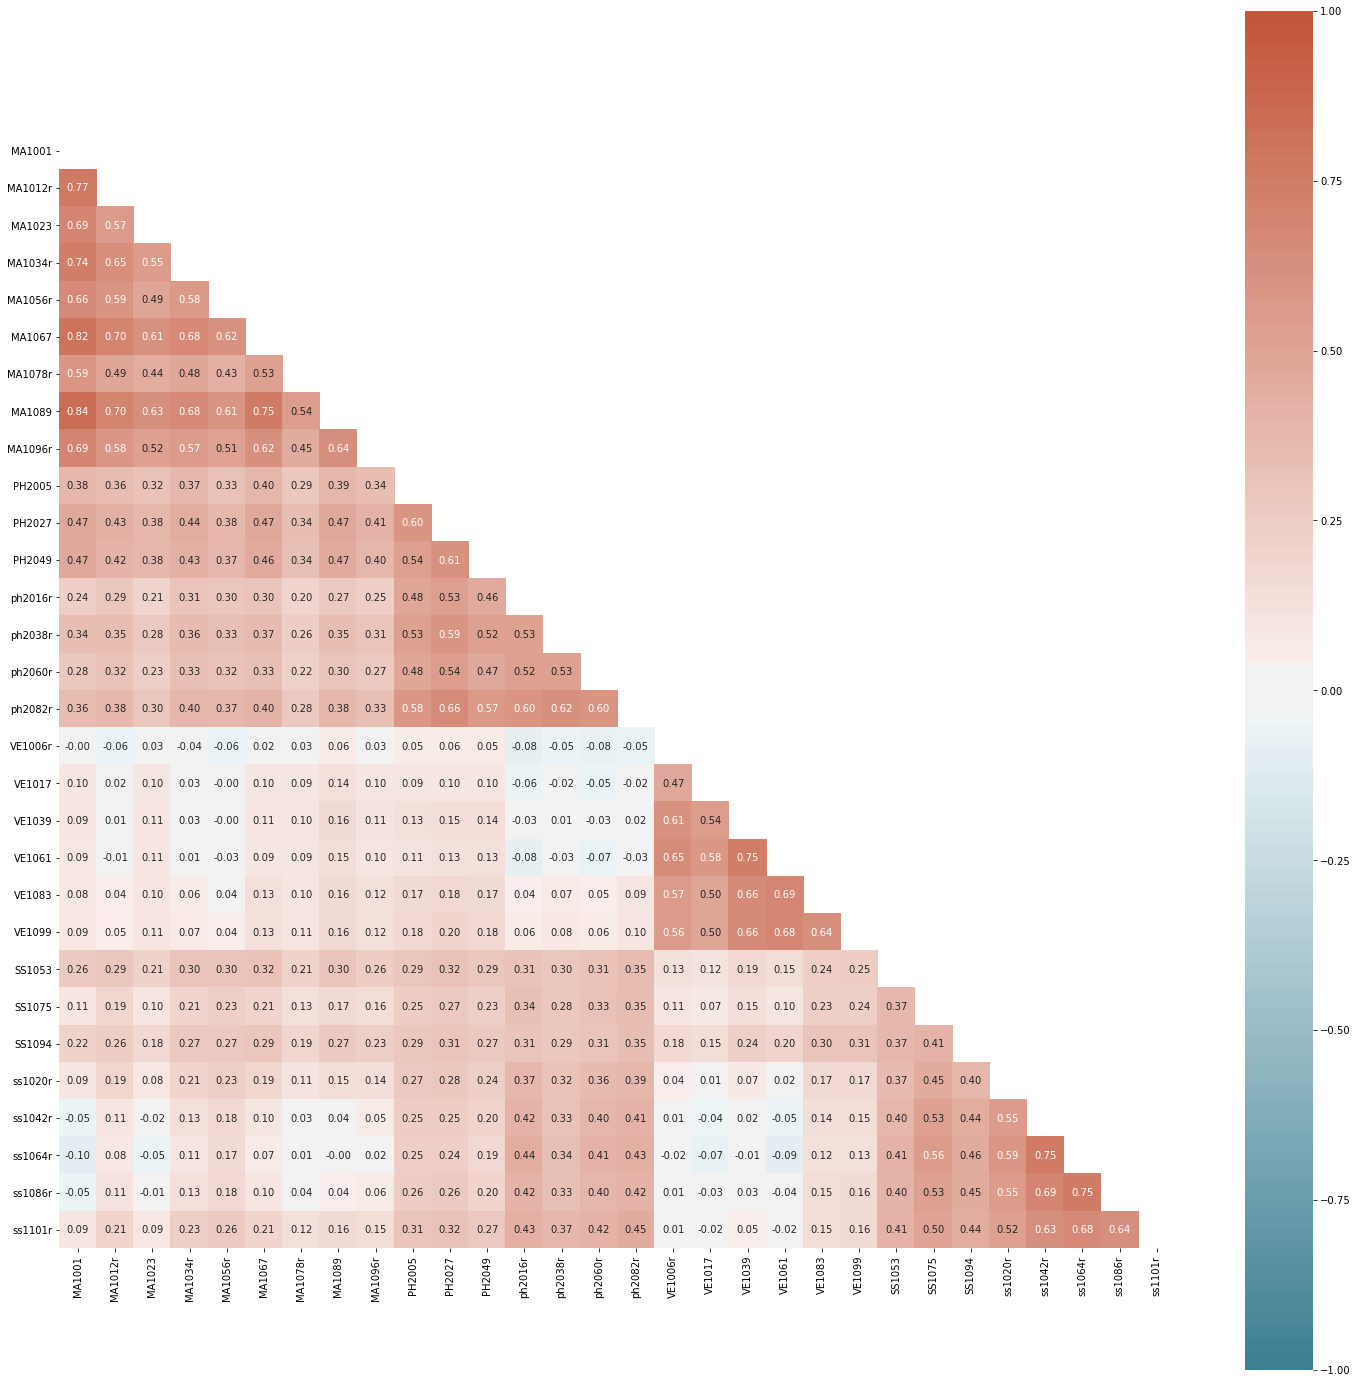

In [104]:
plt.figure(figsize=(25,25))

# plot the heatmap for correlation matrix
correlation_matrix = reproduced_correlation_matrix 
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(correlation_matrix, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200), xticklabels= communalities.index,yticklabels = communalities.index, 
                 mask=mask, square=True, 
                 annot=True, fmt='.2f')

In [106]:
df_loadings

,fa1,fa2,fa3,fa4,highest loading
MA1001,0.969898,-0.122323,-0.020121,-0.001656,fa1
MA1012r,0.827619,0.089644,-0.087774,-0.022092,fa1
MA1023,0.683791,-0.091900,0.032961,0.054835,fa1
MA1034r,0.776096,0.103860,-0.061498,0.015033,fa1
MA1056r,0.743373,0.204261,-0.093462,-0.062558,fa1
MA1067,0.852149,0.065133,0.018587,0.001317,fa1
MA1078r,0.592474,-0.012030,0.038521,0.033456,fa1
MA1089,0.853999,-0.021554,0.073808,0.020006,fa1
MA1096r,0.695457,-0.002075,0.036512,0.042511,fa1
ss1064r,-0.041063,0.904466,-0.009154,-0.000494,fa2


In [119]:
factor_corr = pd.DataFrame(factor_correlation_matrix)

factor_corr.index = ['fa{}'.format(i) for i in range (1,5)]
factor_corr.columns = ['fa{}'.format(i) for i in range (1,5)]
factor_corr

,fa1,fa2,fa3,fa4
fa1,1.000000,0.058231,0.137915,0.579903
fa2,0.058231,1.000000,-0.008650,0.483005
fa3,0.137915,-0.008650,1.000000,0.106484
fa4,0.579903,0.483005,0.106484,1.000000


In [123]:
communalities.rename(columns = {0: "communalities"})

,communalities
MA1001,0.956073
MA1012r,0.701181
MA1023,0.480109
MA1034r,0.617120
MA1056r,0.606974
MA1067,0.730747
MA1078r,0.353773
MA1089,0.735627
MA1096r,0.486806
PH2005,0.563554


#### recompute initial communalities (with all removed items)

In [127]:
r2 = []
for col in df_rmv_eighth_item.columns :
    
    rsquared = compute_communalities_initial(df_rmv_eighth_item, col)
    r2.append(rsquared)
    
repr_quality = pd.DataFrame()
repr_quality ["variable"] = df_rmv_eighth_item.columns 
repr_quality ["communalities"] = r2 

repr_quality

,variable,communalities
0,MA1001,0.781012
1,MA1012r,0.769873
2,MA1023,0.546526
3,MA1034r,0.712995
4,MA1056r,0.742972
5,MA1067,0.787746
6,MA1078r,0.487928
7,MA1089,0.718642
8,MA1096r,0.610003
9,PH2005,0.532593


In [131]:
#repr_quality= repr_quality.set_index("variable")

tab_qlt = pd.concat([repr_quality, communalities], axis=1)

tab_qlt= tab_qlt.rename(columns = {"communalities": "Qualité représentation initiale", 0: "Qualité représentation après extraction"})
tab_qlt

,Qualité représentation initiale,Qualité représentation après extraction
variable,,
MA1001,0.781012,0.956073
MA1012r,0.769873,0.701181
MA1023,0.546526,0.480109
MA1034r,0.712995,0.617120
MA1056r,0.742972,0.606974
MA1067,0.787746,0.730747
MA1078r,0.487928,0.353773
MA1089,0.718642,0.735627
MA1096r,0.610003,0.486806


In [135]:
diff_communalite= tab_qlt["Qualité représentation initiale"].mean() - tab_qlt["Qualité représentation après extraction"].mean()
diff_communalite

0.046563344630853876

#### Structure matrix

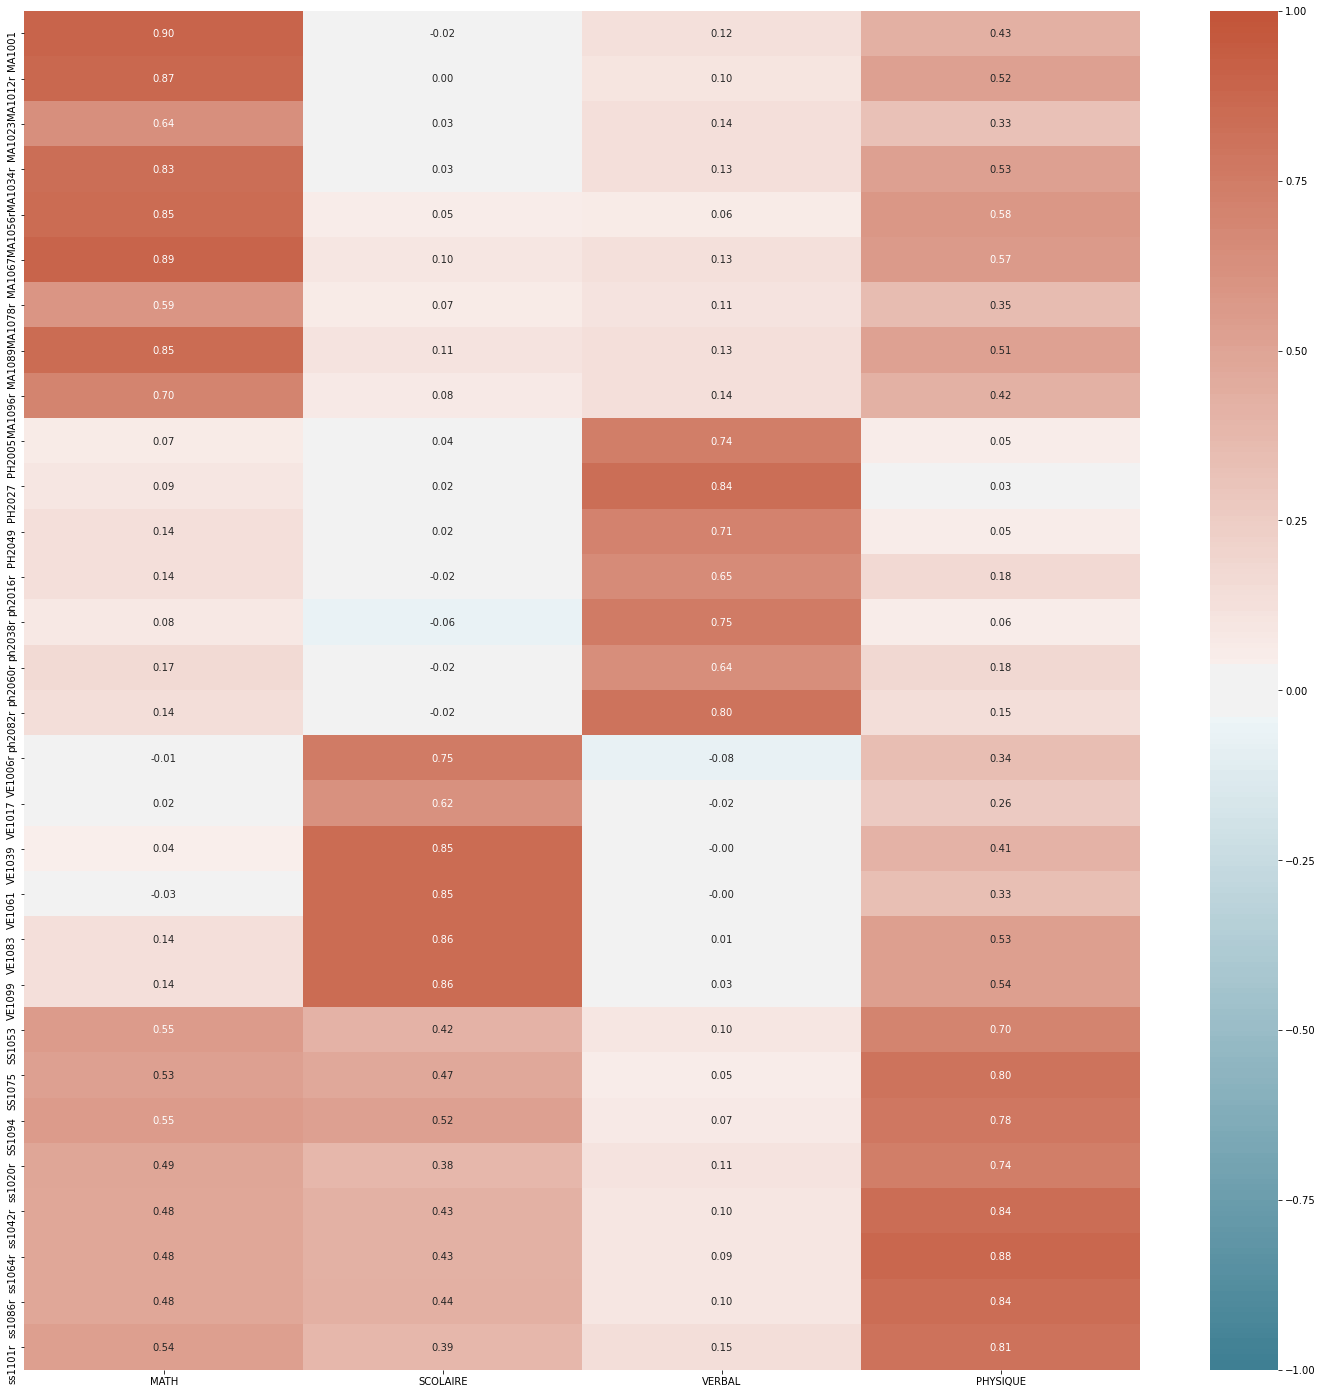

In [133]:
plt.figure(figsize=(25,25))

# plot the heatmap for correlation matrix
correlation_matrix = structure_matrix 


ax = sns.heatmap(correlation_matrix, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200), xticklabels=["MATH", "SCOLAIRE", "VERBAL", "PHYSIQUE"],yticklabels =  communalities.index, square=False, 
                 annot=True, fmt='.2f')

### Interprétation

In [171]:
# Following oblique rotation, the meaning of factors is ascertained from the pattern matrix
#Les saturations plus élevées que .40 sont interprétées (16% de variance expliquée; Stevens 2002)